In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import matplotlib
matplotlib.rcParams['text.usetex'] = True

In [2]:
def getVarPlot(fin, b, numUse = None):
    
    data = pk.load(open(fin, 'rb'))['Experiments_All_Accuracy']        
    numEntries = np.size(data[0])
    if numUse is not None:
        numEntries = int(np.min([numEntries, numUse]))
    numUsefulRows = 0
    for i in range(len(data)):
        if np.size(data[i])<numEntries:break
        numUsefulRows += 1

    data = [x[:numEntries] for x in data]
    data = np.array(data[:numUsefulRows])
    data_mean = np.mean(data,axis=0)
    data_std = np.std(data, axis=0)
    data_min = np.min(data,axis=0)
    data_max = np.max(data,axis=0)
    data_x = np.arange(np.size(data_mean))*b
    
    return data_x, data_mean, data_std
    
#     return data_x, data_mean, data_min, data_max 

# Ablation

# Uncertain MNIST

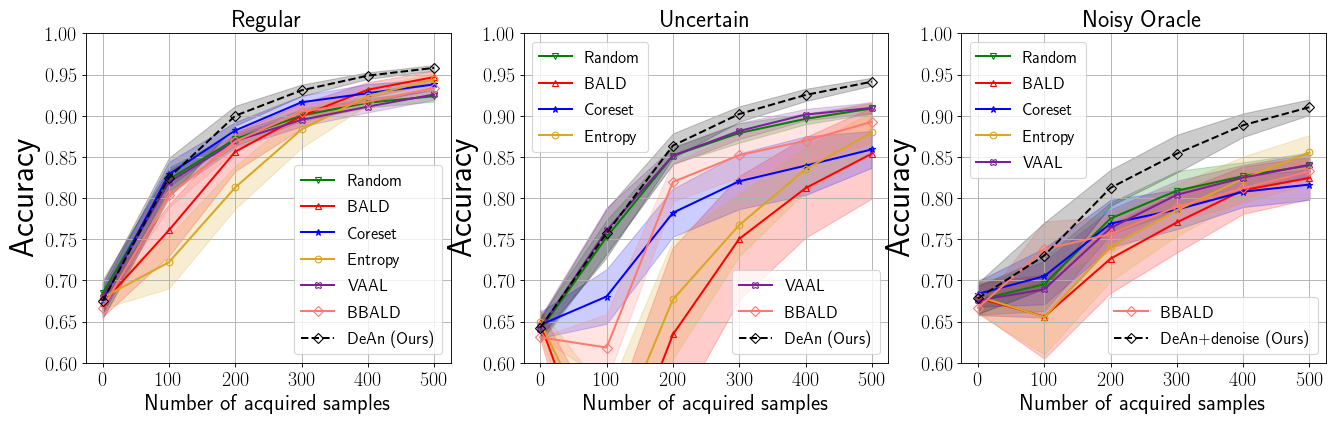

In [191]:
# init size = 40, pyTorch on Jatayu

doSaveFig = False  # False
b = 100
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'BBALD', 'DeAn (Ours)', 'DeAn+denoise', 'test', 't1']
color = ['g', 'r', 'b', 'goldenrod', 'xkcd:Purple', 'xkcd:salmon', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 'D', 's', 's' , 's', 's', 's', 's']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_MNIST_Experiment_500.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_MNIST_Experiment_501.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_MNIST_Experiment_502.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_MNIST_Experiment_503.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_MNIST_Experiment_510.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_9.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_MNIST_Experiment_505.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.legend(legendName)
plt.title('Regular')
if doSaveFig:
    f.savefig('MNIST_KSC_noise_free_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_MNIST_Experiment_554.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_MNIST_Experiment_555.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_MNIST_Experiment_556.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_MNIST_Experiment_557.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_MNIST_Experiment_558.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_67.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_MNIST_Experiment_559.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.title('Uncertain')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:4], legendName[:4], loc='upper left')
l2 = plt.legend(plotHandle[4:], legendName[4:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('uncertainMNIST_noise_free_b_100_abl.pdf', bbox_inches='tight')

name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'BBALD', 'DeAn+denoise (Ours)', 'DeAn+denoise', 'test', 't1']
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_MNIST_Experiment_560.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_MNIST_Experiment_561.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_MNIST_Experiment_562.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_MNIST_Experiment_563.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_MNIST_Experiment_564.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_12.p',
#       'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_MNIST_Experiment_565.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster-noise_b_100_MNIST_Experiment_583.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.title('Noisy Oracle')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:5], legendName[:5], loc='upper left')
l2 = plt.legend(plotHandle[5:], legendName[5:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('MNIST_KSC_0d3_b_100_abl.pdf', bbox_inches='tight')

# Noise layer

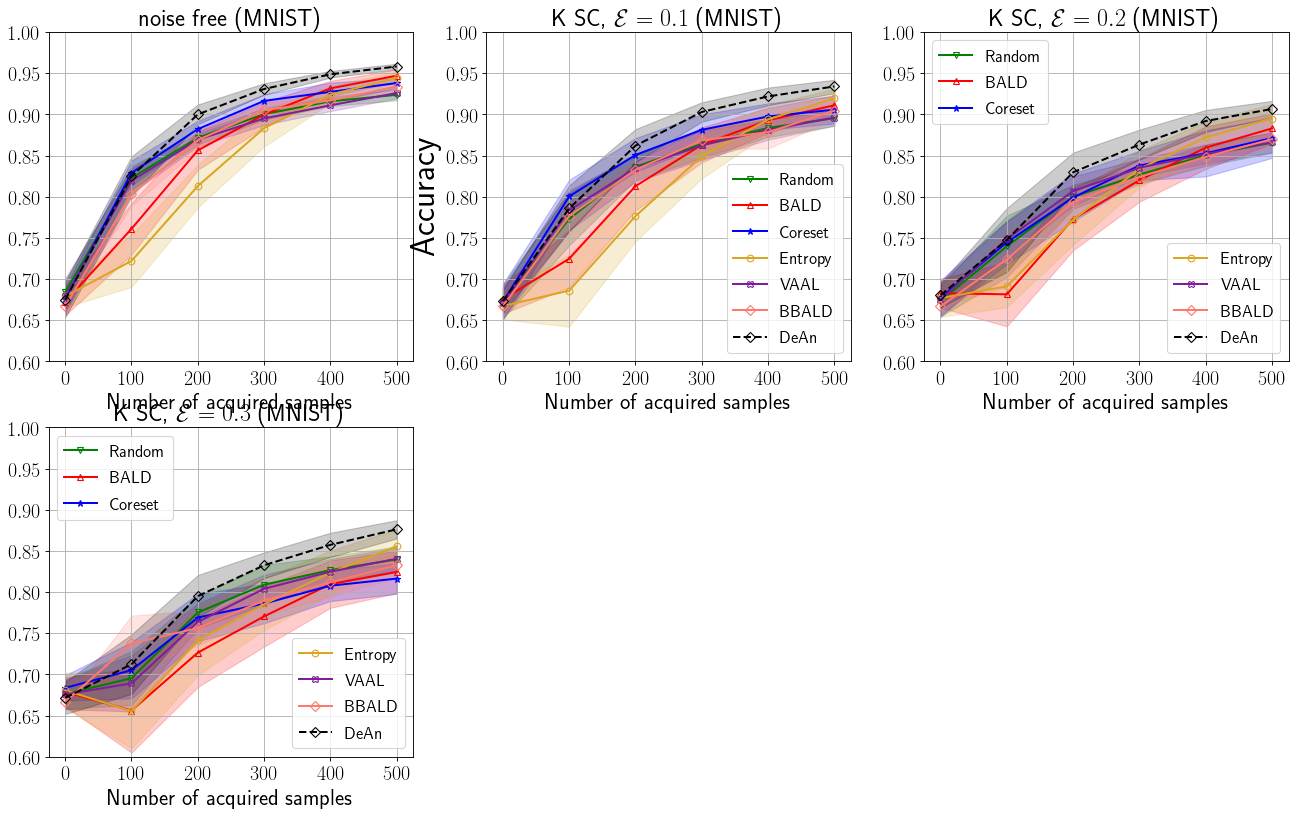

In [192]:
# init size = 40, pyTorch on Jatayu

doSaveFig = False  # False
b = 50*2
legendName = []
name = ['Random', 'BALD', 'Coreset', 'Entropy', 'VAAL', 'BBALD', 'DeAn', 'DeAn+denoise', 'test', 't1']
# color = ['g', 'r', 'b', 'm', 'k', 'goldenrod', 'xkcd:Purple', 'C1', 'C2', 'xkcd:Brown', 'xkcd:navy blue', 'k']
color = ['g', 'r', 'b', 'goldenrod', 'xkcd:Purple', 'xkcd:salmon', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 'D', 's', 's' , 's', 's', 's', 's']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_MNIST_Experiment_500.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_MNIST_Experiment_501.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_MNIST_Experiment_502.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_MNIST_Experiment_503.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_MNIST_Experiment_510.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_9.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_MNIST_Experiment_505.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=20)
plt.ylim([0.6,1])
# plt.legend(legendName)
plt.title('noise free (MNIST)')
if doSaveFig:
    f.savefig('MNIST_KSC_noise_free_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_MNIST_Experiment_511.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_MNIST_Experiment_512.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_MNIST_Experiment_513.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_MNIST_Experiment_514.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_MNIST_Experiment_515.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_10.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_MNIST_Experiment_516.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.1$ (MNIST)')
plt.legend(legendName)
if doSaveFig:
    f.savefig('MNIST_KSC_0d1_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_MNIST_Experiment_517.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_MNIST_Experiment_518.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_MNIST_Experiment_519.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_MNIST_Experiment_520.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_MNIST_Experiment_521.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_11.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_MNIST_Experiment_522.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=20)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.2$ (MNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:3], legendName[:3], loc='upper left')
l2 = plt.legend(plotHandle[3:], legendName[3:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('MNIST_KSC_0d2_b_100.pdf', bbox_inches='tight')
    
if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 4)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random_b_100_MNIST_Experiment_560.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD_b_100_MNIST_Experiment_561.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy_b_100_MNIST_Experiment_562.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt_b_100_MNIST_Experiment_563.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL_b_100_MNIST_Experiment_564.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_12.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster_b_100_MNIST_Experiment_565.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=20)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.3$ (MNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:3], legendName[:3], loc='upper left')
l2 = plt.legend(plotHandle[3:], legendName[3:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('MNIST_KSC_0d3_b_100.pdf', bbox_inches='tight')

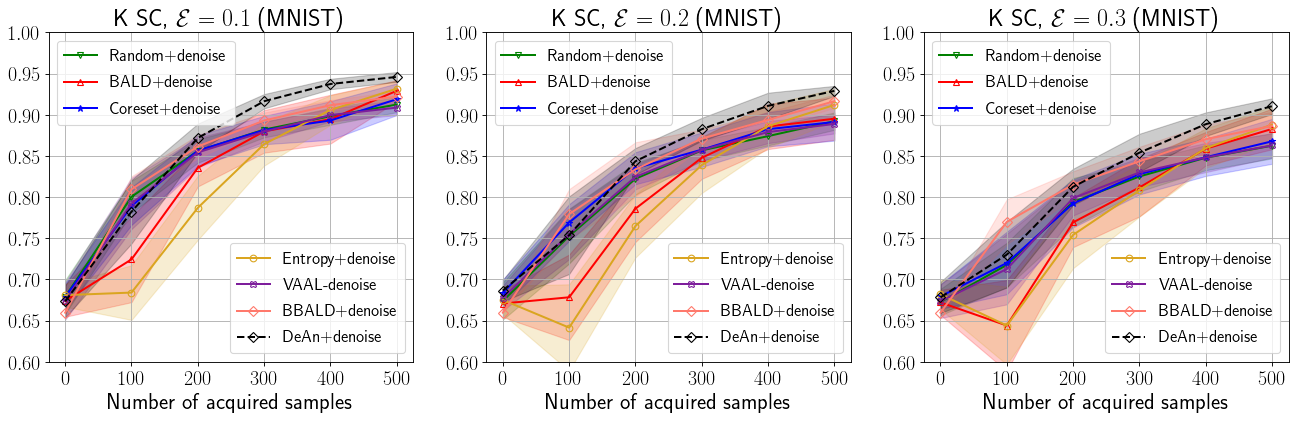

In [185]:
# init size = 40, pyTorch on Jatayu

doSaveFig = False  # False
b = 100
legendName = []
name = ['Random+denoise', 'BALD+denoise', 'Coreset+denoise', 'Entropy+denoise', 'VAAL-denoise', 'BBALD+denoise', 'DeAn+denoise', 'test', 't1']
color = ['g', 'r', 'b', 'goldenrod', 'xkcd:Purple', 'xkcd:salmon', 'k', 'm' , 'C1', 'C2', 'xkcd:Brown', 'k']
marker = ['v', '^', '*', 'o', 'X', 'D', 'D', 's', 's' , 's', 's', 's', 's']
linestyle = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'solid', 'solid', 'solid']

f = plt.figure(figsize=(20,12), dpi=80)
plt.rc('font', size=18)
plt.rc('legend', fontsize=15)
plt.subplot(2, 3, 1)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random-noise_b_100_MNIST_Experiment_566.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD-noise_b_100_MNIST_Experiment_567.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy-noise_b_100_MNIST_Experiment_568.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt-noise_b_100_MNIST_Experiment_569.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL-noise_b_100_MNIST_Experiment_570.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_60.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster-noise_b_100_MNIST_Experiment_571.p',
      ]
legendName = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=20)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.1$ (MNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:3], legendName[:3], loc='upper left')
l2 = plt.legend(plotHandle[3:], legendName[3:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('nlayer_MNIST_KSC_0d1_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 2)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random-noise_b_100_MNIST_Experiment_572.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD-noise_b_100_MNIST_Experiment_573.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy-noise_b_100_MNIST_Experiment_574.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt-noise_b_100_MNIST_Experiment_575.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL-noise_b_100_MNIST_Experiment_576.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_61.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster-noise_b_100_MNIST_Experiment_577.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=20)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.2$ (MNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:3], legendName[:3], loc='upper left')
l2 = plt.legend(plotHandle[3:], legendName[3:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('nlayer_MNIST_KSC_0d2_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)
else:
    plt.subplot(2, 3, 3)
fin = ['Results/MNIST/New/Jatayu/NeuRIPS/AL_Random-noise_b_100_MNIST_Experiment_578.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_BALD-noise_b_100_MNIST_Experiment_579.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_k-center-greedy-noise_b_100_MNIST_Experiment_580.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_maxEnt-noise_b_100_MNIST_Experiment_581.p',
       'Results/MNIST/New/Jatayu/NeuRIPS/AL_VAAL-noise_b_100_MNIST_Experiment_582.p',
      'BatchBALD/Results/MNIST/AL_BBALD_b_100_Exp_62.p',
      'Results/MNIST/New/Jatayu/NeuRIPS/AL_cluster-noise_b_100_MNIST_Experiment_583.p',
      ]
legendName = []
plotHandle = []
for i, file in enumerate(fin):
    x, y_m, y_s = getVarPlot(file, b)
    p = plt.plot(x, y_m, marker=marker[i], color=color[i],
                 markerfacecolor='none', linestyle=linestyle[i], linewidth=1.8)
    plt.fill_between(x, y_m-y_s, y_m+y_s, color=p[0].get_color(), alpha=0.2)
    algName = file.split('_')[1] + '_' + file.split('_')[-1][:-2]
    legendName.append(name[i])
    plotHandle.extend(p)

plt.grid()
plt.xlabel('Number of acquired samples', fontsize=20)
# plt.ylabel('Accuracy', fontsize=20)
plt.ylim([0.6,1])
plt.title('K SC, $\mathcal{E} = 0.3$ (MNIST)')
# plt.legend(legendName)
l1 = plt.legend(plotHandle[:3], legendName[:3], loc='upper left')
l2 = plt.legend(plotHandle[3:], legendName[3:], loc=4)
plt.gca().add_artist(l1)
if doSaveFig:
    f.savefig('nlayer_MNIST_KSC_0d3_b_100.pdf', bbox_inches='tight')

if doSaveFig:
    f = plt.figure(figsize=(20,12), dpi=80)
    plt.rc('font', size=18)
    plt.rc('legend', fontsize=15)
    plt.subplot(2, 3, 1)